# 勾配降下法

$$Minimize~5x^{2}-6xy+3y^{2}+6x-6y$$

以上の制約条件のない最適化を考える。
ここで、

$$f(x,y)=5x^{2}-6xy+3y^{2}+6x-6y$$

とし、$$f(x,y)=k$$を満たす点の集合を考えると$k$に対して様々な等高線が描ける。  
一方で、$f$の勾配

$$\nabla f=\begin{pmatrix} \dfrac{\partial f}{\partial x} \\ \dfrac{\partial f}{\partial y} \end{pmatrix}$$

を考えた時、ある点$(x_{0}, y_{0})$を通る等高線の接線に垂直方向で$k$がおおっくなる方向を向いたベクトルが、

$$\nabla f(x_{0}, y_{0})$$

になるので、$k$を小さくするには$- \nabla f$の方向に進めばよいことになる

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x,y, k
from sympy.plotting import plot
from sympy.plotting import plot3d

import warnings
warnings.filterwarnings('ignore')

init_printing()

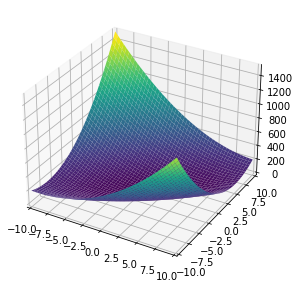

In [14]:
k = 5*x**2-6*x*y+3*y**2+6*x-6*y
plot3d(k, (y, -10, 10), (x, -10, 10))

In [54]:
# Sample_code/chap04/gd.py

import numpy as np

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        '''
        f : 最小化したい関数。n次元ベクトルを引数にとり、戻り値は数値
        df : 最小化したい関数の導関数。n次元ベクトルを引数にとり、戻り値もn次元ベクトル
        alpha : 探索時の移動の大きさ
        eps : アルゴリズムの終了条件基準（L2ノルムがeps以下の時に終了）
        '''
        self.f = f 
        self.df = df  
        self.alpha = alpha
        self.eps = eps
        self.path = None

    def solve(self, init):
        '''
        init : 初期値
        solveメソッド : 初期値としてx0を取り、計算結果の最適解はx_に保存、最適値はopt_に保存される
        '''
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)



[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


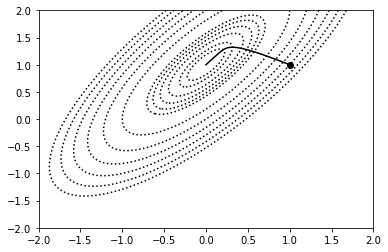

In [53]:
from Sample_code.chap04 import gd

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


algo = gd.GradientDescent(f, df)
initial = np.array([1, 1]) # スタート点
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4] # ここではkの値と同義となる
plt.contour(xs, ys, f(xx).reshape(xmesh.shape),
            levels=levels,
            colors="k",  linestyles="dotted")
# https://pystyle.info/matplotlib-contour/
# levels – 等高線の間隔を指定する
# levels 引数で等高線の間隔を指定できます。 整数を指定した場合は、描画範囲を levels 段階に分けるように等高線を作成します。
# リストを指定した場合、Z がその値をとる点を結ぶように等高線を作成します。
plt.show()





## 参考 : 等高線書き方
 [python で等高線を描くなら meshgrid して contour](http://ailaby.com/contour/)
meshgrid でマス目を作る
numpy の meshgrid を使うとマス目の交点が簡単に作れる。




In [6]:
# x軸
x = np.linspace(0, 2, 3)
#------------------------
# array([ 0.,  1.,  2.])
#------------------------
 
# y軸
y = np.linspace(0, 200, 3)
#------------------------------
# array([   0.,  100.,  200.])
#------------------------------
 
X, Y = np.meshgrid(x, y)

In [7]:
X

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [8]:
Y

array([[  0.,   0.,   0.],
       [100., 100., 100.],
       [200., 200., 200.]])

In [9]:
Z = np.sqrt(X**2 + Y**2)

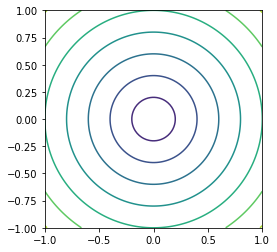

In [10]:
n = 100
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
 
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
 
#
# meshgrid で作った X と Y、そして高さ Z を contour に渡す
#
plt.contour(X, Y, Z)
 
plt.gca().set_aspect('equal') # matplotlibでアスペクト比をset_aspect('equal')で一致させる
plt.show()


## 参考 : np.r_の意味

詳しくはここ  
[多次元配列の結合を行うオブジェクトnp.c_とnp.r_の使い方](https://deepage.net/features/numpy-cr.html)

特に指定しない場合配列同士の結合をする。vstackと同等。vstack関数は、2次元でいうと、垂直方向に(vartical)連結する。  
厳密にいうと、axis=1の方向に結合されることになる。  
結合後は、先頭を0番目としてshapeの1番目の要素数が増えることになる。

In [33]:
a = np.arange(5).reshape(1, -1)
a

array([[0, 1, 2, 3, 4]])

In [36]:
b = np.arange(5).reshape(1, -1)
b

array([[0, 1, 2, 3, 4]])

In [37]:
np.hstack((a, b))

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [40]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [41]:
np.r_[a, b]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

------------------------------

In [48]:
# ここのパートの意味は
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xmesh.shape

In [51]:
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]

print(xx.shape)
print(xx)

(2, 90000)
[[-2.         -1.98662207 -1.97324415 ...  1.97324415  1.98662207
   2.        ]
 [-2.         -2.         -2.         ...  2.          2.
   2.        ]]


In [59]:
print(f(xx).shape)
print(f(xx))

(90000,)
[8.         7.97413899 7.95006767 ... 7.62899744 7.81360387 8.        ]


In [66]:
f([np.array([1,2]),np.array([5,10])])

array([ 26, 152])

In [75]:
f(np.r_[[np.array([1,2])],[np.array([5,10])]])

array([ 26, 152])

In [55]:
f(xx).reshape(xmesh.shape)

array([[ 8.        ,  7.97413899,  7.95006767, ..., 78.98685697,
        79.49253364, 80.        ],
       [ 7.92026935,  7.89333453,  7.86818939, ..., 78.58820371,
        79.09280657, 79.59919911],
       [ 7.84161251,  7.81360387,  7.78738493, ..., 78.19062427,
        78.69415331, 79.19947204],
       ...,
       [31.52054228, 31.17575866, 30.83276473, ...,  7.78738493,
         7.97413899,  8.16268274],
       [31.75973423, 31.4138768 , 31.06980906, ...,  7.70765428,
         7.89333453,  8.08080447],
       [32.        , 31.65306876, 31.3079272 , ...,  7.62899744,
         7.81360387,  8.        ]])

## 参考 : plt.contourの引数levelsの意味

https://pystyle.info/matplotlib-contour/  
levels – 等高線の間隔を指定する  
levels 引数で等高線の間隔を指定できます。 整数を指定した場合は、描画範囲を levels 段階に分けるように等高線を作成します。  
リストを指定した場合、Z がその値をとる点を結ぶように等高線を作成します。

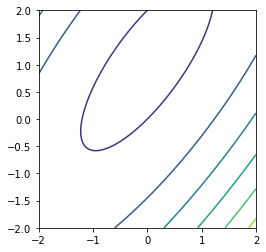

In [85]:
plt.contour(xs, ys, f(xx).reshape(xmesh.shape),
           levels=6)
plt.gca().set_aspect('equal')

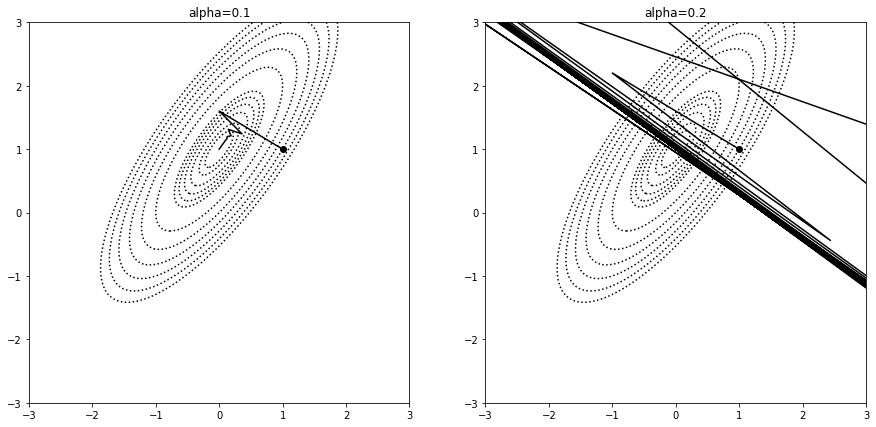

In [51]:
# alphaを変化させた場合

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = gd.GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)


xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2, figsize=(15,7))
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4]
for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[
               :, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape),
                  levels=levels,
                  colors="k",  linestyles="dotted")


plt.show()


# ニュートン法

ニュートン法は与えられた方程式の解を数値的に求める手法。  
最適化の問題でも導関数が0になる点を求めることは最適解を求めることになるので、ニュートン法が使える場合がある。  
与えられたなめらかな関数$f(x)(x\in \mathbb{R})$について
$$f(x) = 0$$

を求めたいとする。  
ニュートン法は初期値$x_{0}$から逐次$x_{1}, x_{2},,,,,$を解に近づけていく。  
$y = f(x)$の$x=x_{k}$における接線と$x$軸との交点を$x_{k+1}$とし、十分小さい値$\varepsilon$について、

$$\left| x_{k+1}-x_{k}\right| <\varepsilon$$

となったら終了

$y = f(x)$の$x=x_{k}$における接線の傾きは$f'\left( x_{k}\right)$なので、接線の方程式は、

$$y=f'(x_{k})(x-x_{k}) + f(x_{k})$$

これと、x軸の好転が$x=x_{k+1}$となる。$x=x_{k+1}$, $y=0$と置くと、

$$x_{k+1}=x_{k}-\dfrac{f\left( x_{k}\right) }{f'\left( x_{k}\right) }$$

In [87]:
def f(x):
    return x**3-5*x+1


def df(x):
    return 3*x**2-5

def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x)/df(x)
        if abs(x-x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new



print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))


2.1284190638445777
0.20163967572340463
-2.330058739567982


In [88]:
from sympy.abc import x,y,k

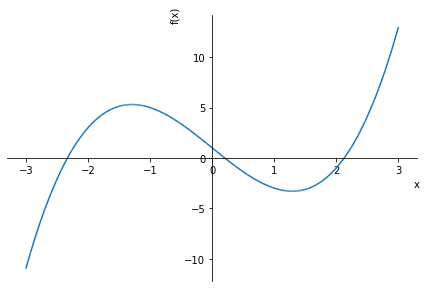

In [95]:
y = x**3 - 5*x + 1
plot(y, (x,-3,3))

ニュートン法は多次元の場合にも拡張できる。  
例として次のような連立方程式を考える。  

$$\begin{cases}f_{1}\left( x.y\right) =x^{3}-2y=0\\ f_{2}\left( x,y\right) =x^{2}+y^{2}-1=0\end{cases}$$


$f$を$\mathbb{R} ^{2}$から$\mathbb{R} ^{2}$の写像として
$$f\left( \overrightarrow{x}\right) =\begin{pmatrix} f_{1}\left( \overrightarrow{x}\right) \\ f_{2}\left(\overrightarrow{x}\right) \end{pmatrix}$$

ここで
$$\overrightarrow{x}=\begin{pmatrix} x \\ y \end{pmatrix}$$

この時、$f$のヤコビヤン行列を次に定義

$$J_{f}\left( \overrightarrow{x}\right) =\begin{pmatrix} \dfrac{\partial f_{1}}{\partial x}\left( \overrightarrow{x}\right) & \dfrac{\partial f_{1}}{\partial y}\left( \overrightarrow{x}\right) \\ \dfrac{\partial f_{2}}{\partial x}\left( \overrightarrow{x}\right) & \dfrac{\partial f_{2}}{\partial y}\left( \overrightarrow{x}\right) \end{pmatrix} $$


この時、ニュートン法は次の更新式で与えられる。

$$\overrightarrow{x}_{k+1}=\overrightarrow{x}_{k}-J_{f}\left( \overrightarrow{x}_{k}\right) ^{-1} f(\overrightarrow{x}_{k})$$

In [100]:
import numpy as np
from numpy import linalg


class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter

    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1) # 1次元のベクトルに変換
        while True:
            x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x)) # linalg.inv()は逆行列の計算
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)] # np.vstackと同等で、更新毎のpathが格納されたベクトルが行で連なるイメージ
            if ((x-x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


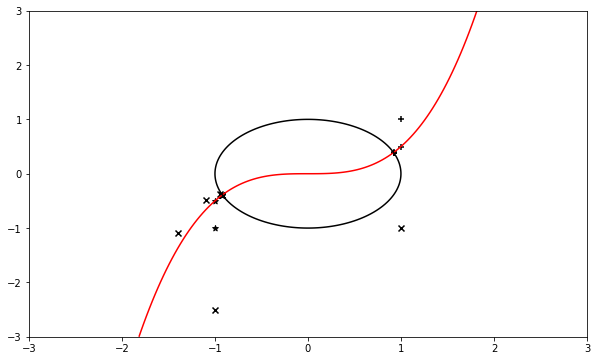

In [110]:

# 実際の様子

import numpy as np
import matplotlib.pyplot as plt
from Sample_code.chap04 import newton


def f1(x, y):
    return x**3-2*y


def f2(x, y):
    return x**2+y**2-1


def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

plt.figure(figsize = (10, 6))

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = newton.Newton(f, df)

initials = [np.array([1, 1]),
            np.array([-1, -1]),
            np.array([1, -1])]
markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
                solver.path_[:, 1], color="k", marker=m)
    print(sol)

plt.show()


## 参考 : ヤコビヤン行列
一変数の場合，微分係数は関数の一次近似（の接線の傾き）という意味があった。

$$y(x)≒ y(x_{0})+y′(x_{0})(x−x_{0})$$

多変数の場合，接線の傾きに相当するのがヤコビ行列

$$\overrightarrow{y}\left( \overrightarrow{x}\right) \fallingdotseq \overrightarrow{y}\left( \overrightarrow{x}_{0}\right)+J\left( \overrightarrow{x}_{0}\right) \left( \overrightarrow{x}-\overrightarrow{x}_{0}\right)$$